### Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:\\Users\\CVR\\Desktop\\a2\\1000 Sales Records.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


### Data Preprocessing

***Missing values***

In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [9]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


In [10]:
df.nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date         841
Order ID          1000
Ship Date          835
Units Sold         960
Unit Price          12
Unit Cost           12
Total Revenue      999
Total Cost         999
Total Profit       999
dtype: int64

### Checking for outliers

Text(0.5, 1.0, 'Distribution of Total Cost')

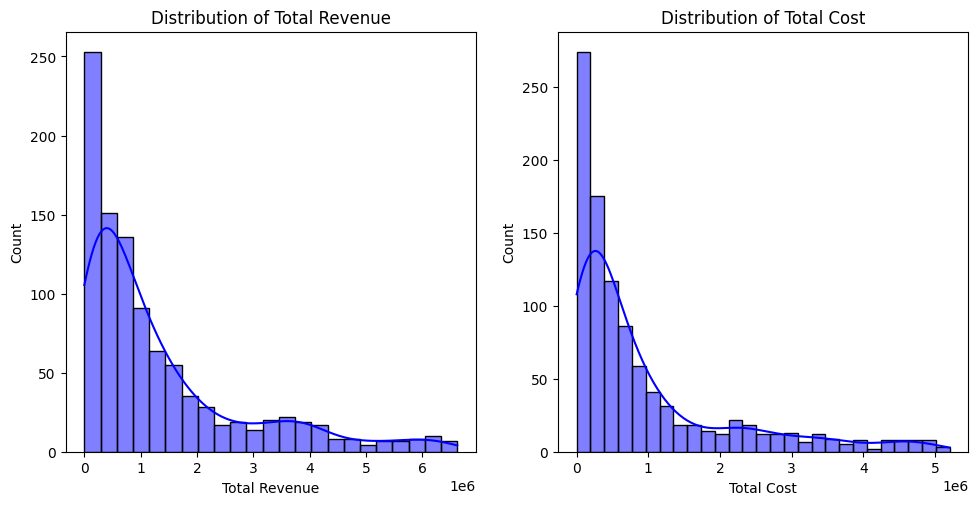

In [12]:
df_eda = df
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Total Revenue'], kde=True, color='blue')
plt.title('Distribution of Total Revenue')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Total Cost'], kde=True, color='blue')
plt.title('Distribution of Total Cost')

### Presence of Outliers

Text(0.5, 1.0, 'Boxplot of Total Cost')

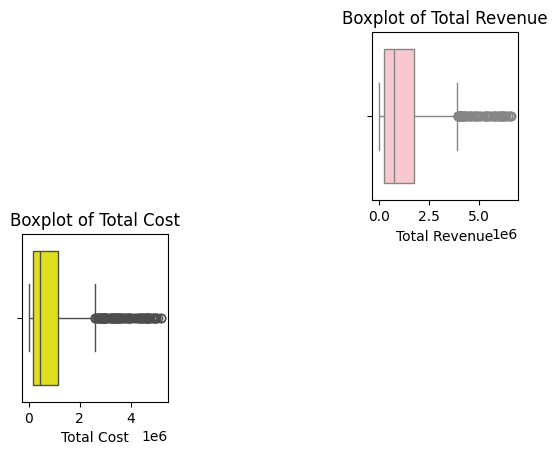

In [14]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Total Revenue', color='pink')
plt.title('Boxplot of Total Revenue')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Total Cost', color='yellow')
plt.title('Boxplot of Total Cost')

### Handling outliers using iqr


In [15]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Total Revenue", "Total Cost"]  
df= remove_outliers_iqr(df, columns_to_filter)


Text(0.5, 1.0, 'Distribution of Total Cost')

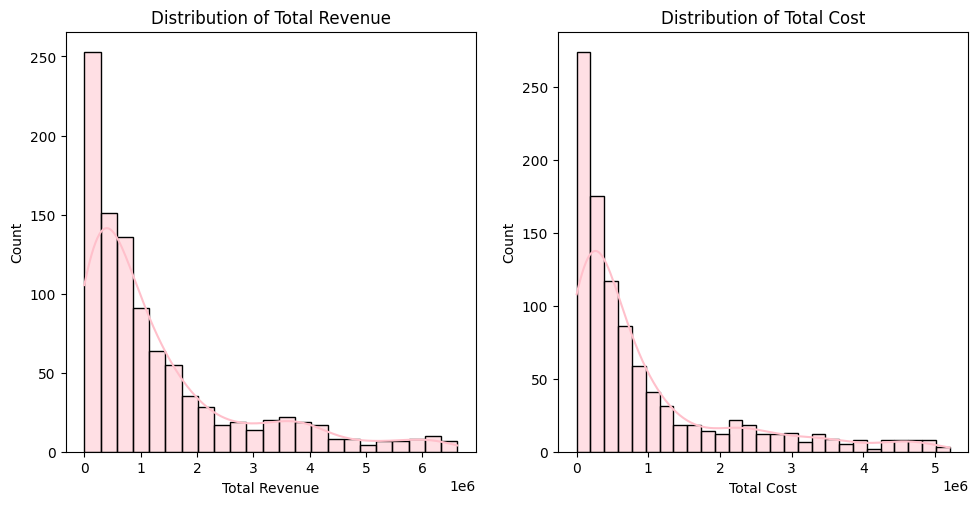

In [17]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Total Revenue'], kde=True, color='pink')
plt.title('Distribution of Total Revenue')
plt.subplot(2, 3, 2)
sns.histplot(df_eda['Total Cost'], kde=True, color='pink')
plt.title('Distribution of Total Cost')

### Boxplots

Text(0.5, 1.0, 'Boxplot of Total Cost')

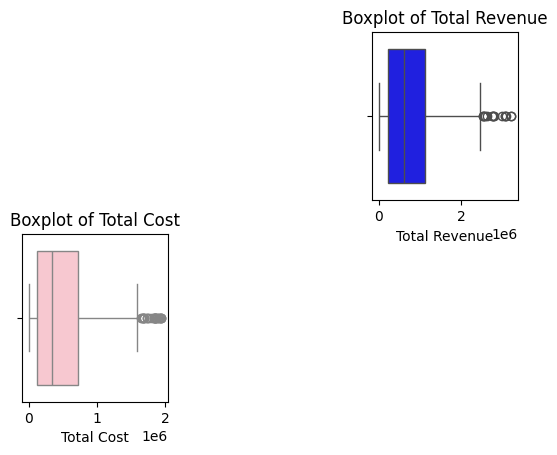

In [20]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Total Revenue', color='blue')
plt.title('Boxplot of Total Revenue')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Total Cost', color='pink')
plt.title('Boxplot of Total Cost')

In [23]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

### Adding Profit Margin and Sales per Unit

In [24]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100

# Add Sales per Unit column
df['Sales per Unit'] = df['Total Revenue'] / df['Units Sold']
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Sales per Unit
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34,40.977541,154.06
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62,37.550924,255.28
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98,43.067574,205.70
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,25.830654,9.33
5,Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52,43.067574,205.70


In [27]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100
# Categorize Profit Margin into High, Medium, Low
def categorize_profit_margin(margin):
    if margin > 20:
        return 'High'
    elif 10 <= margin <= 20:
        return 'Medium'
    else:
        return 'Low'

# Apply categorization
df['Profit Margin Category'] = df['Profit Margin'].apply(categorize_profit_margin)

### Checking for the new columns

In [28]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Sales per Unit,Profit Margin Category
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34,40.977541,154.06,High
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62,37.550924,255.28,High
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98,43.067574,205.70,High
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,25.830654,9.33,High
5,Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52,43.067574,205.70,High


<Axes: xlabel='Total Cost', ylabel='Count'>

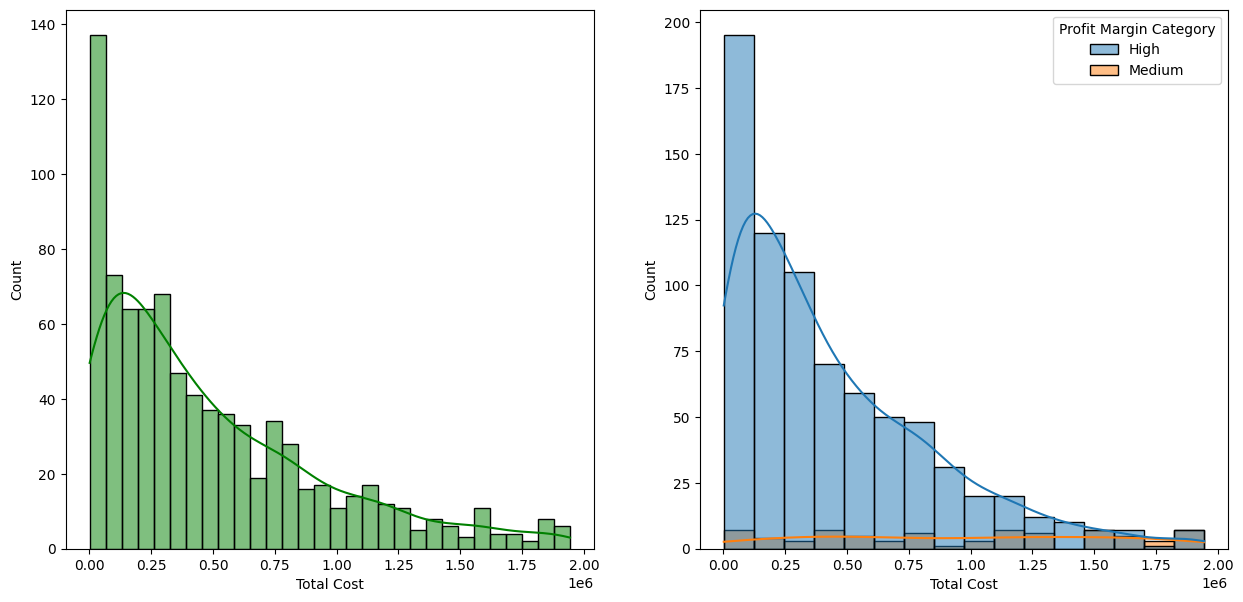

In [30]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Cost',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Cost',kde=True,hue='Profit Margin Category')

<Axes: xlabel='Units Sold', ylabel='Count'>

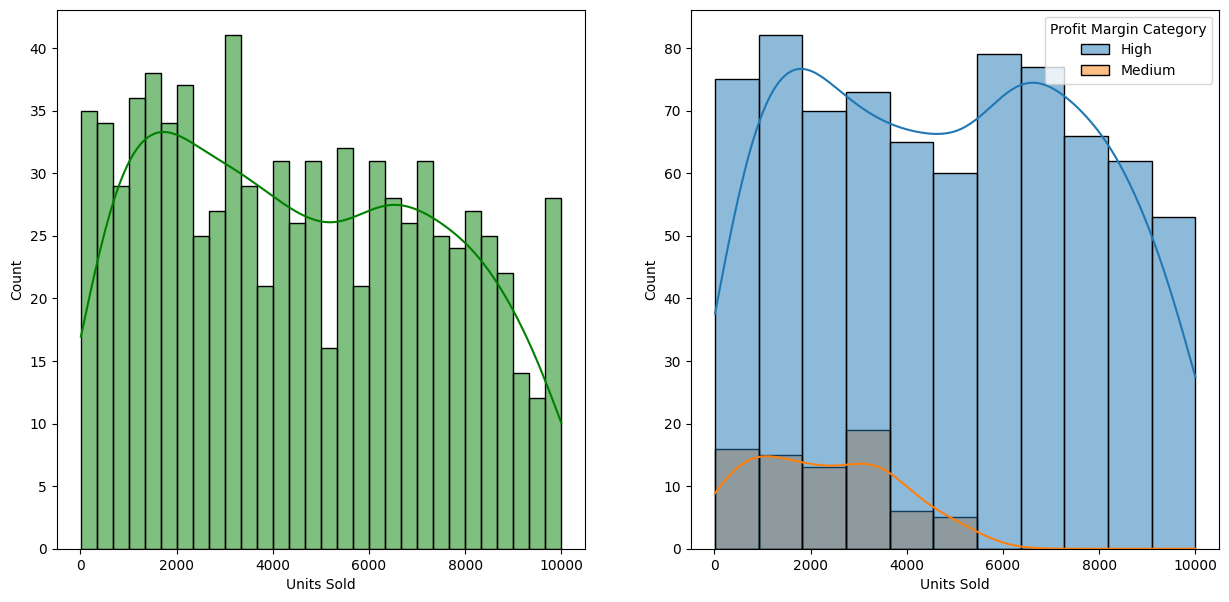

In [33]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Units Sold',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Units Sold',kde=True,hue='Profit Margin Category')

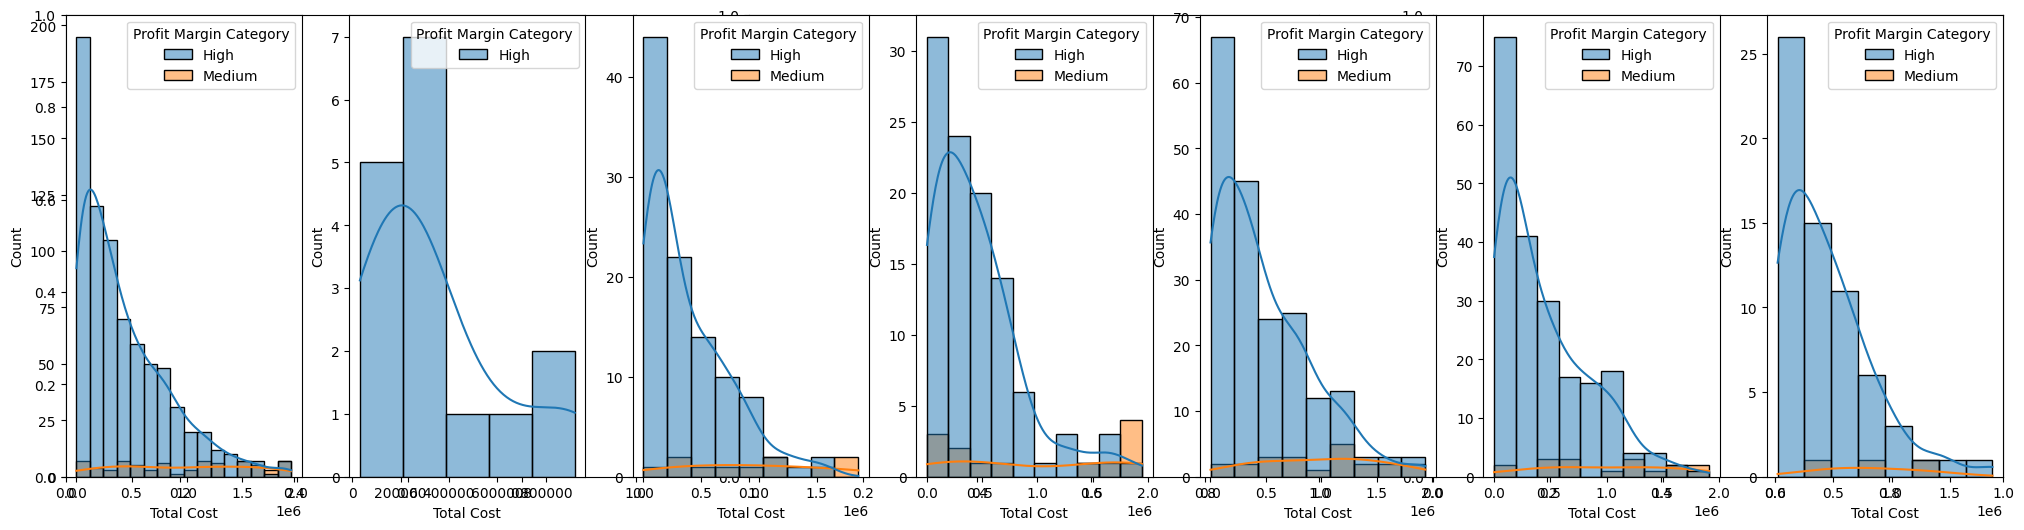

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(171)
sns.histplot(data=df,x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(172)
sns.histplot(data=df[df.Region=='North America'],x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(173)
sns.histplot(data=df[df.Region=='Middle East and North Africa'],x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(174)
sns.histplot(data=df[df.Region=='Asia'],x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(175)
sns.histplot(data=df[df.Region=='Sub-Saharan Africa'],x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(176)
sns.histplot(data=df[df.Region=='Europe'],x='Total Cost',kde=True,hue='Profit Margin Category')
plt.subplot(177)
sns.histplot(data=df[df.Region=='Australia and Oceania'],x='Total Cost',kde=True,hue='Profit Margin Category')

plt.show()

### Multivariate Analysis

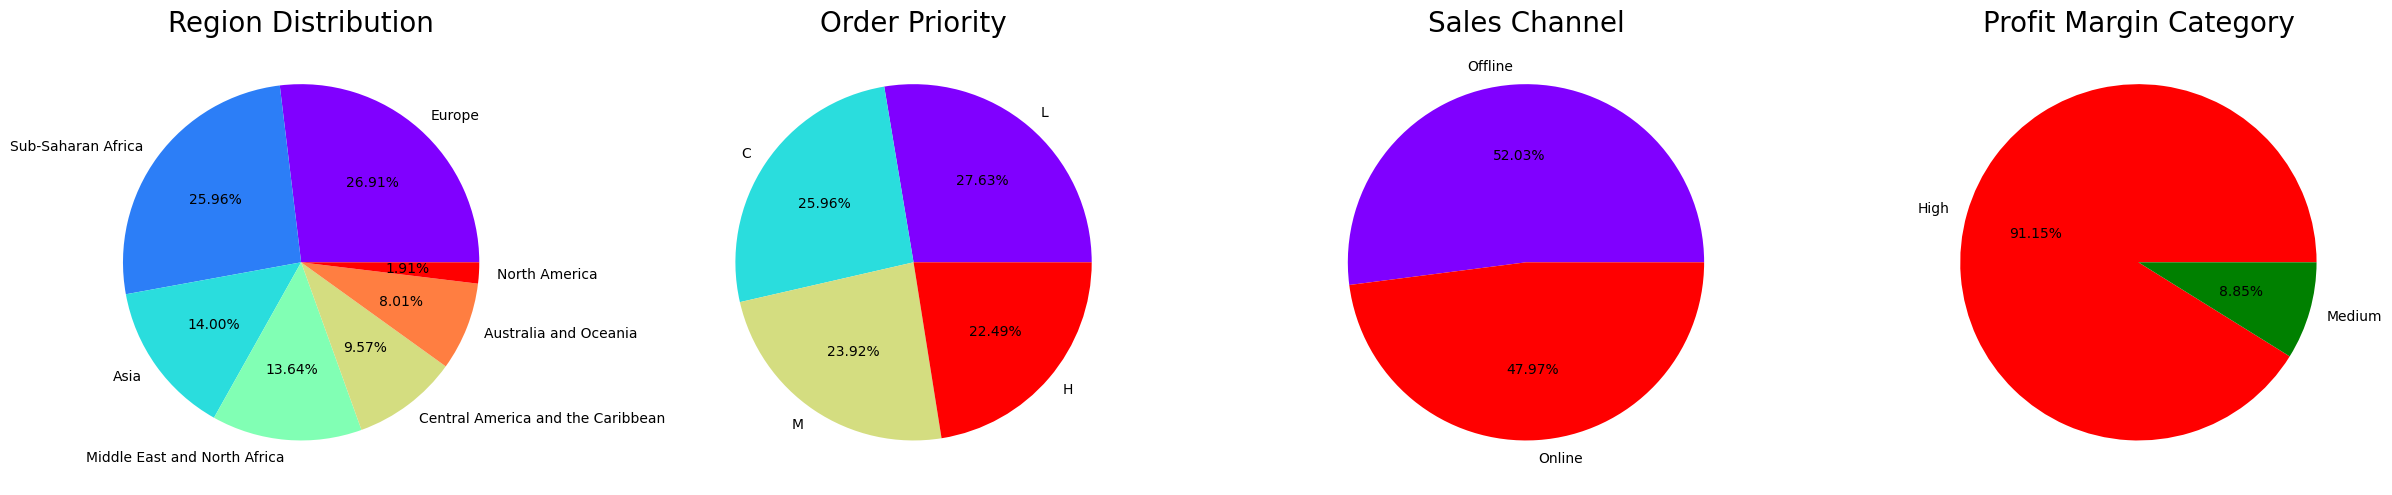

In [ ]:

plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['Region'].value_counts() 
labels = size.index  
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Region Distribution', fontsize=20)
plt.axis('off') 
plt.subplot(1, 5, 2)
size = df['Order Priority'].value_counts()
labels = size.index  
color = plt.cm.rainbow(np.linspace(0, 1, len(labels))) 

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Order Priority', fontsize=20)
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['Sales Channel'].value_counts() 
labels = size.index  
color = plt.cm.rainbow(np.linspace(0, 1, len(labels))) 
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Sales Channel', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['Profit Margin Category'].value_counts()
labels = size.index  
color = ['red', 'green', 'blue'][:len(labels)] 

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Profit Margin Category', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

In [35]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Sales per Unit,Profit Margin Category
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34,40.977541,154.06,High
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62,37.550924,255.28,High
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98,43.067574,205.70,High
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,25.830654,9.33,High
5,Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52,43.067574,205.70,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Asia,Nepal,Meat,Offline,C,4/9/2017,919890248,5/18/2017,4821,421.89,364.69,2033931.69,1758170.49,275761.20,13.558036,421.89,Medium
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36,36.138419,152.58,High
996,Europe,Georgia,Baby Food,Offline,H,8/1/2011,590768182,9/7/2011,288,255.28,159.42,73520.64,45912.96,27607.68,37.550924,255.28,High
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,5/12/2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28,40.977541,154.06,High


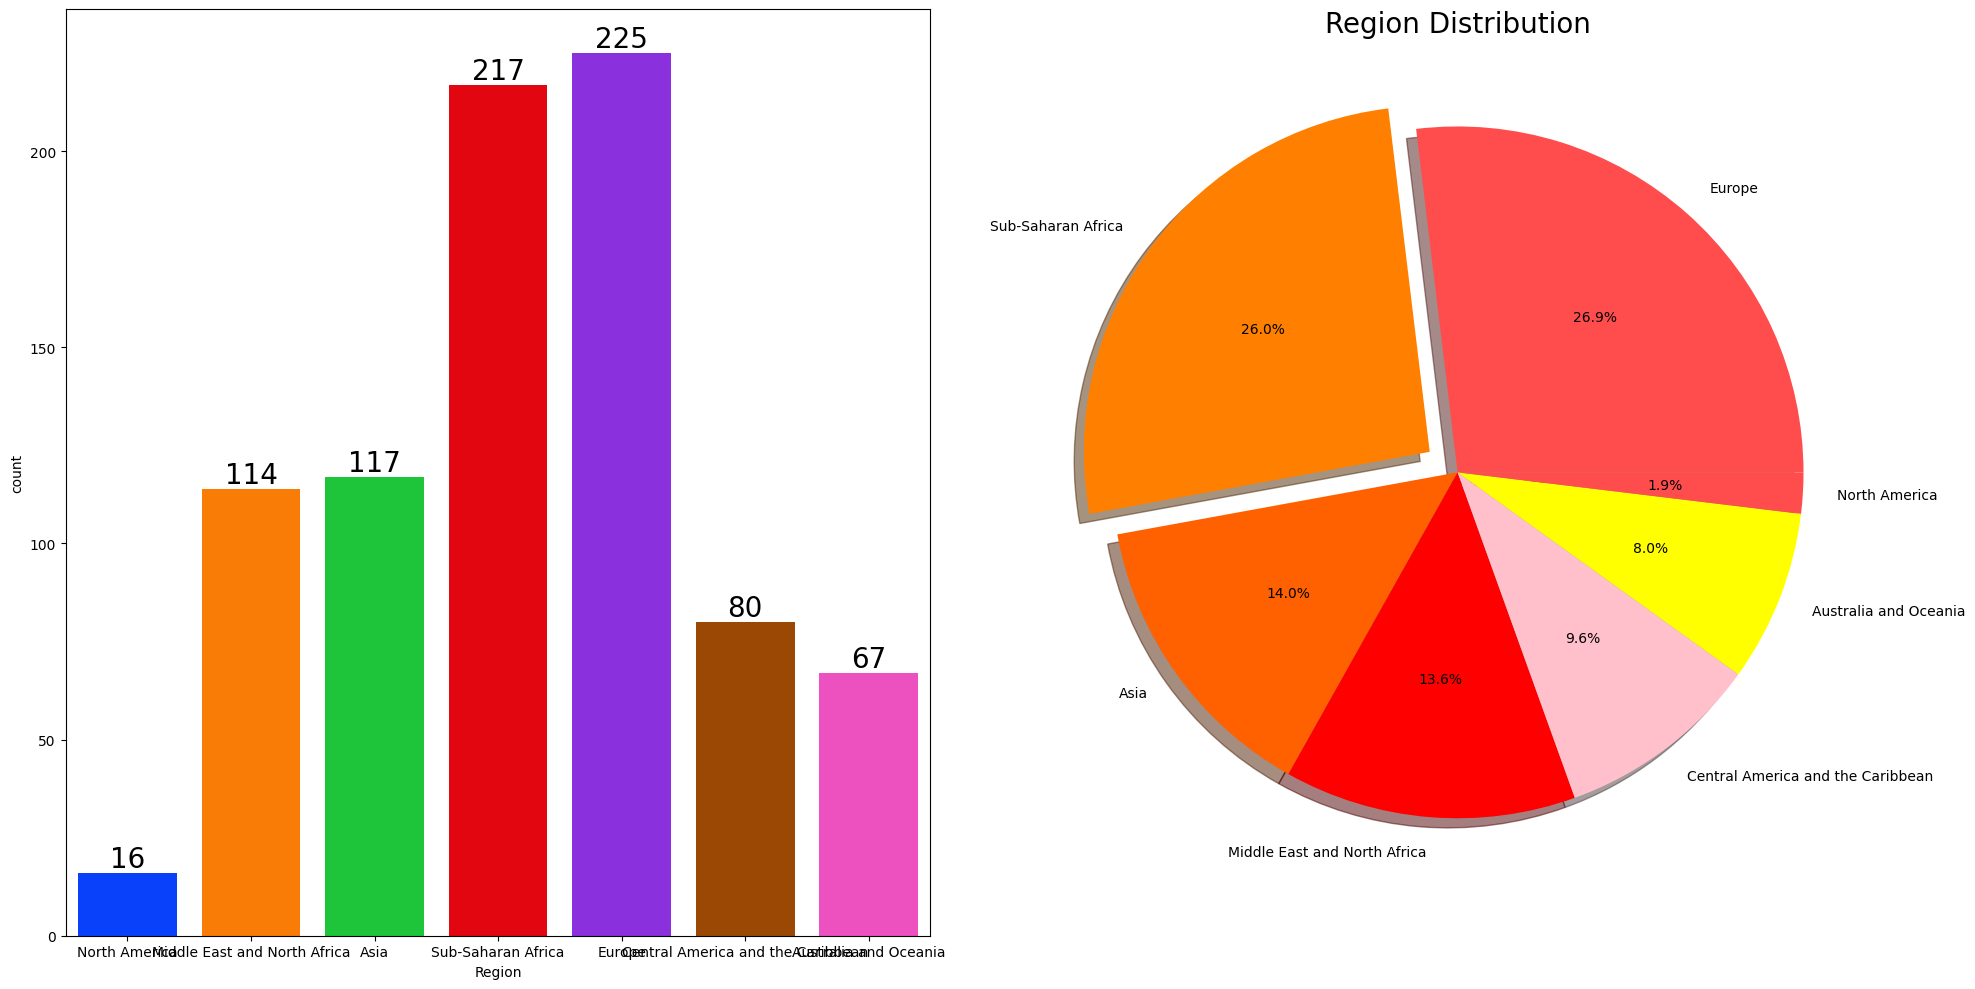

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['Region'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sizes = df['Region'].value_counts()
labels = sizes.index.tolist() 
colors = ['#ff4d4d', '#ff8000', '#ff6000', 'red', 'pink', 'yellow'][:len(labels)]  
explode = [0] * len(labels) 
if len(labels) > 1:
    explode[1] = 0.1
ax[1].pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)
ax[1].set_title('Region Distribution', fontsize=20)
plt.tight_layout()
plt.show()
